# An fMRI study of composition in noun and verb phrases
### Bonnasse-Gahot, Bemis, Perez-Guevara, Dehaene, Pallier
Compute a mask common to all subjects

In [1]:
import numpy as np
import glob
import os.path as op
import nibabel as nib

import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.masking import compute_multi_epi_mask

import simpcomp as sc

In [2]:
fmri_imgs = []
for sub_id in sc.subject_list:
    fmri_imgs.extend(sorted(
        glob.glob(op.join(sc.fmri_data, sub_id, 'func', 
                      '{}_task-maindesign_run-0*_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'.format(sub_id)))))
    fmri_imgs.append(op.join(sc.fmri_data, sub_id, 'func', 
                    '{}_task-languagelocalizer_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'.format(sub_id)))    

mask_epi = compute_multi_epi_mask(fmri_imgs)

nib.save(mask_epi, op.join(sc.home_folder, 'derivatives', 'mask_simpcomp.nii'))

0.20110067543232263


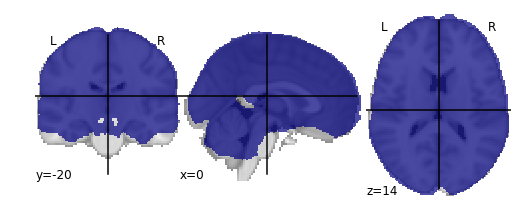

In [3]:
print(np.flatnonzero(np.array(mask_epi.get_data()>0)).size/np.array(mask_epi.get_data()).size)

plotting.plot_roi(mask_epi)
plt.show()